# Setup Environment

In [1]:
from working_dir import set_working_dir

In [2]:
set_working_dir()

Current working directory: /Users/jiaxi/Documents/GitHub/CS410-Project


In [3]:
%load_ext autoreload
%autoreload 2

# Import Libraries

In [4]:
import pandas as pd
import dtale
import glob
from cbfile import CBFile
import seaborn as sns
import matplotlib.pyplot as plt
from sentence import Sentences, Sentence

In [5]:
%matplotlib inline

In [6]:
pd.set_option('max_colwidth', 400)

# Load Frequent Words

In [7]:
file_path = "data/wordFrequency.xlsx"
wf_df = pd.read_excel(io=open(file_path, 'rb'), sheet_name='4 forms (219k)', engine="openpyxl")

In [8]:
wf_df.head()

,rank,word,freq,#texts,%caps,blog,web,TVM,spok,fic,...,news,acad,blogPM,webPM,TVMPM,spokPM,ficPM,magPM,newsPM,acadPM
0,1,the,50074257,483041,0.11,6272412,7101104,3784652,5769026,6311500,...,6582642,7447070,50480.69,55212.83,29550.39,45736.71,53341.69,53975.61,54070.43,62167.47
1,2,to,25557793,478977,0.02,3579158,3590504,2911924,3427348,2871517,...,3013501,2978222,28805.25,27917.05,22736.17,27171.94,24268.65,25264.13,24753.18,24861.93
2,3,and,24821791,478727,0.09,3211226,3458960,1828166,3325442,3064047,...,2995111,3633119,25844.11,26894.26,14274.24,26364.03,25895.82,26215.95,24602.12,30328.95
3,4,of,23605964,478144,0.01,2952017,3462140,1486604,2678416,2330823,...,2893200,4517563,23757.98,26918.99,11607.33,21234.42,19698.97,26054.07,23765.01,37712.21
4,5,a,21889251,477421,0.05,2783458,2827106,2519099,2716641,2749208,...,2959649,2229222,22401.41,21981.44,19669.01,21537.47,23234.95,24619.48,24310.83,18609.35


# Word to Sentence Distribution

1) Generate the word to sentence distribution.

In [9]:
sentences_df = pd.read_csv(f"data/cbtest_NE_train_cleaned.csv")
sentences_df

,number,sentence,word_count
0,1,Some were abroad ; several were ill ; a few were in prison among the Saracens ; others were captives in the dens of ogres .,26
1,4,"shouted the king , through a speaking-trumpet ; when , suddenly , the air was filled with a sound like the rustling of the wings of birds .",28
2,5,"Flitter , flitter , flutter , went the noise ; and when the queen looked up , lo and behold !",21
3,6,"on every seat was a lovely fairy , dressed in green , each with a most interesting-looking parcel in her hand .",22
4,8,"The king did , and he was most friendly and polite to the fairies .",15
...,...,...,...
140578,18,"Hans Van Ripper as executor of his estate , examined the bundle which contained all his worldly effects .",19
140579,19,The mysterious event caused much speculation at the church on the following Sunday .,14
140580,20,"Knots of gazers and gossips were collected in the churchyard , at the bridge , and at the spot where the hat and pumpkin had been found .",28
140581,19,"He was one of your wary men , who never laugh but upon good grounds -- when they have reason and law on their side .",26


In [10]:
sentences = Sentences([Sentence(s) for s in sentences_df["sentence"].tolist()])

In [11]:
def count_containing_sentence(word):
    sentences_containing_word = sentences.filter_by_word(word)
    return len(sentences_containing_word)

word_sentence_df = pd.DataFrame(columns=["word", "sentence_count"])
word_sentence_df["word"] = wf_df["word"]
word_sentence_df["sentence_count"] = word_sentence_df["word"].apply(count_containing_sentence)   

2) Analyze the word to sentence distribution. 75% words have sentence count of 125 or less. 95% words have sentence count of 1050 or less.

In [12]:
round(word_sentence_df.describe())

,sentence_count
count,5050.0
mean,349.0
std,2189.0
min,0.0
25%,4.0
50%,27.0
75%,125.0
max,66551.0


In [13]:
word_sentence_df.quantile(.95)

sentence_count    1050.1
Name: 0.95, dtype: float64

3) For sentence count with 1050 or less, most words have less than 100 sentence count.

<AxesSubplot:xlabel='sentence_count', ylabel='Count'>

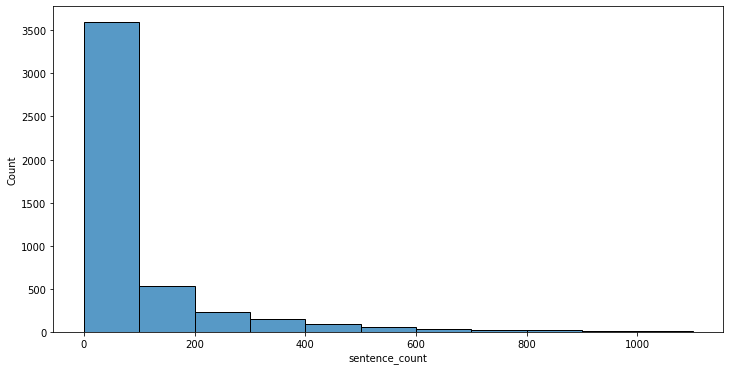

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=word_sentence_df, x="sentence_count", binwidth = 100, binrange = (0,1050))

<AxesSubplot:xlabel='sentence_count', ylabel='Count'>

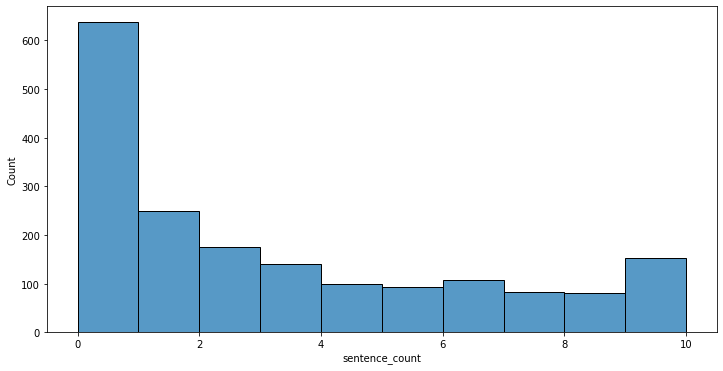

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=word_sentence_df, x="sentence_count", bins = 10, binrange = (0,10))

In [31]:
word_sentence_df[(word_sentence_df["sentence_count"] < 5) & (word_sentence_df["sentence_count"] != 0)]

,word,sentence_count
204,okay,1
259,system,4
346,research,1
372,program,4
440,area,1
...,...,...
5035,slavery,2
5037,manual,1
5041,compelling,4
5042,violation,1


In [32]:
len(word_sentence_df[(word_sentence_df["sentence_count"] >= 5) & (word_sentence_df["sentence_count"] != 0)])

3747

4) For words with 10000 or more sentence count, we've looked at some example words and noticed those are common words so makes sense there're less than 5% of the words with very high sentence count.

<AxesSubplot:xlabel='sentence_count', ylabel='Count'>

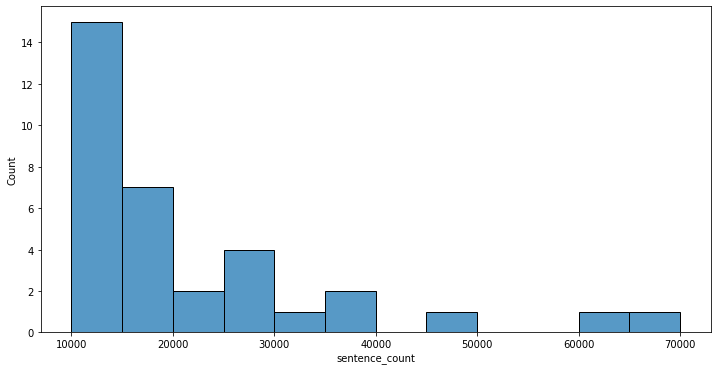

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=word_sentence_df, x="sentence_count", binwidth = 5000, binrange = (10000,66551))

In [17]:
word_sentence_df[word_sentence_df["sentence_count"] > 10000]

,word,sentence_count
0,the,66551
1,to,47071
2,and,60026
3,of,34336
4,a,38097
5,in,25261
6,i,35418
7,that,24125
8,you,22486
9,it,27809


# Words without Sentences

In [18]:
words_without_sentences = word_sentence_df[word_sentence_df["sentence_count"] == 0].merge(wf_df, how='inner', on="word")

We reviewed the words without sentences, and noticed:

1) There are abbreviations like "n't", "qwq" and "pm".
2) Some common words like "tv" and "ok" are not in our sentence data set.
3) There are children inappropriate words like "shit", "fuck" and "sexual".
4) "uh-huh" doesn't have any sentence count but "uh" and "huh" have sentence count.

In [19]:
words_without_sentences.iloc[0:20]

,word,sentence_count,rank,freq,#texts,%caps,blog,web,TVM,spok,...,news,acad,blogPM,webPM,TVMPM,spokPM,ficPM,magPM,newsPM,acadPM
0,n't,0,19,5312220,355926,0.01,685469,533017,1636148,772040,...,399929,57833,5516.69,4144.34,12774.97,6120.72,6887.94,3273.74,3285.05,482.78
1,yeah,0,143,705657,69371,0.83,13696,12144,484277,161406,...,3227,521,110.23,94.42,3781.21,1279.62,218.85,35.48,26.51,4.35
2,percent,0,244,357621,93532,0.01,28355,39106,4150,58772,...,98052,63022,228.20,304.06,32.40,465.94,34.18,492.64,805.41,526.10
3,data,0,391,235073,55131,0.09,34463,42554,5206,6350,...,14828,94801,277.36,330.87,40.65,50.34,42.56,252.48,121.80,791.39
4,obama,0,392,235051,34259,0.99,86211,74662,580,38842,...,20430,3042,693.83,580.52,4.53,307.94,1.01,88.49,167.81,25.39
5,guys,0,412,226717,70595,0.08,23538,15744,107645,34696,...,17265,839,189.44,122.41,840.49,275.07,119.16,102.14,141.82,7.00
6,ok,0,467,198588,44102,0.88,13821,10245,64742,71579,...,6334,873,111.23,79.66,505.50,567.48,52.93,30.52,52.03,7.29
7,federal,0,505,185072,60922,0.25,23271,29864,4224,29066,...,46603,26784,187.29,232.20,32.98,230.43,16.86,184.51,382.80,223.59
8,economic,0,533,172193,54128,0.09,22987,23908,830,19967,...,25419,57772,185.00,185.89,6.48,158.30,8.83,160.72,208.79,482.28
9,media,0,562,162182,63584,0.11,35151,30280,3792,26021,...,23767,20756,282.90,235.43,29.61,206.29,19.97,159.02,195.22,173.27


In [20]:
words_without_sentences.iloc[[24, 34, 39, 44]]

,word,sentence_count,rank,freq,#texts,%caps,blog,web,TVM,spok,...,news,acad,blogPM,webPM,TVMPM,spokPM,ficPM,magPM,newsPM,acadPM
24,shit,0,903,105096,18580,0.22,9002,5677,73570,66,...,18,250,72.45,44.14,574.43,0.52,122.78,15.73,0.15,2.09
34,fuck,0,1074,89192,12404,0.36,4978,3651,69582,11,...,1,223,40.06,28.39,543.29,0.09,80.26,9.89,0.01,1.86
39,sexual,0,1144,84266,25634,0.05,9408,9370,4451,10657,...,10458,24873,75.72,72.85,34.75,84.49,26.00,94.96,85.90,207.64
44,fucking,0,1216,79814,11530,0.10,5599,3520,60136,5,...,1,114,45.06,27.37,469.54,0.04,76.36,11.02,0.01,0.95


In [21]:
word_sentence_df[word_sentence_df["word"].str.contains("uh") == True]

,word,sentence_count
581,uh,1
1331,huh,2
5045,uh-huh,0


We also checked the words without sentences in the original data to see if they are filtered out due to data cleansing and confirmed these words are not in the original data either.

In [22]:
file_path = f"data/CBTest/data/cbtest_NE_train.txt"
file = CBFile(file_path = file_path)
original_df = file.to_pandas()

In [23]:
original_df = original_df.drop_duplicates(subset=["sentence"])
len(original_df)

352943

In [24]:
original_sentences = Sentences([Sentence(s) for s in original_df["sentence"].tolist()])

In [25]:
word_sentence_check_df = pd.DataFrame(columns=["word", "sentence_count"])
word_sentence_check_df["word"] = word_sentence_df[word_sentence_df["sentence_count"] == 0]["word"]
word_sentence_check_df["sentence_count"] = word_sentence_check_df["word"].apply(count_containing_sentence) 

In [26]:
word_sentence_check_df[word_sentence_check_df["sentence_count"] != 0]

,word,sentence_count
